In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

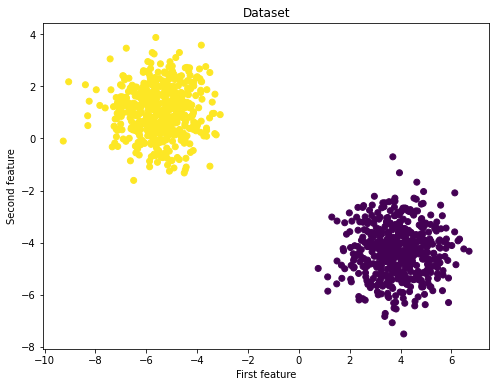

In [2]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [4]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

In [5]:
p = Perceptron()
w_trained, b_trained = p.train(X_train, y_train,learning_rate=0.05, n_iters=500)

In [6]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


In [7]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

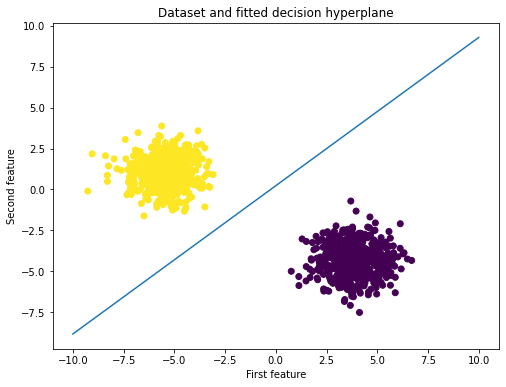

In [8]:
plot_hyperplane(X, y, w_trained, b_trained)